In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [3]:
data=pd.read_csv("data_cleaned.csv")

In [4]:
data.head()

,manufacturer,model,version,fuel_date,odometer,trip_distance(km),quantity(kWh),fuel_type,tire_type,city,motor_way,country_roads,driving_style,consumption(kWh/100km),A/C,park_heating,avg_speed(km/h),ecr_deviation,fuel_note
0,Volkswagen,Golf,e-Golf,0.610891204,75140,67,7.97,Electricity,Summer tires,1,0,1,Normal,11.9,0,0,45.0,-0.8,Restreichweite 100km = Total 167km
1,Volkswagen,Golf,e-Golf,0.52755787,74977,106,12.29,Electricity,Summer tires,1,1,1,Moderate,11.6,0,0,52.0,-1.1,CCS St.Katarina Restreichweite 56km = Total 162km
2,Volkswagen,Golf,e-Golf,0.485891204,74871,66,7.59,Electricity,Summer tires,1,0,1,Normal,11.5,0,0,44.0,-1.2,Restreichweite 105km = Total 171km
3,Volkswagen,Golf,e-Golf,0.444224537,74805,99,11.48,Electricity,Summer tires,1,0,1,Moderate,11.6,0,0,41.0,-1.1,Restreichweite 72km = Total 171km
4,Volkswagen,Golf,e-Golf,0.360891204,74706,112,12.76,Electricity,Summer tires,1,1,1,Moderate,11.4,0,0,40.0,-1.3,Restreichweite 50km = Total 162km


# Regression Tree


In [5]:
def tree_reg(data,columns_x,column_y):
    global y_test_tr
    global X_test_tr
    reg=DecisionTreeRegressor(random_state=1)
    X=data[columns_x]
    Y=data[column_y]
    X_train,X_test_tr,y_train,y_test_tr=train_test_split(X,Y,random_state=1)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test_tr)
    mse=mean_squared_error(y_test_tr,y_pred)
    
    
    return y_pred,mse

In [6]:
data.columns

Index(['manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'quantity(kWh)', 'fuel_type', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)', 'ecr_deviation', 'fuel_note'],
      dtype='object')

In [7]:
columns_x=['quantity(kWh)' , 'city',
       'motor_way', 'country_roads', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)']
column_y='trip_distance(km)'

In [8]:
y_pred_tr,mse_tr=tree_reg(data,columns_x,column_y)

In [9]:
def plot_graph(y_pred):
    sns.scatterplot(X_test_tr['quantity(kWh)'],y_test_tr)
    sns.scatterplot(X_test_tr['quantity(kWh)'],y_pred)
    plt.show()

In [10]:
def plot_difference(y_pred):
    sns.scatterplot(X_test_tr['quantity(kWh)'],y_test_tr-y_pred)
    plt.show()

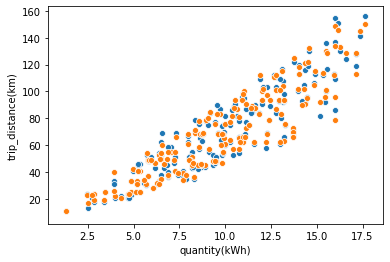

In [11]:
plot_graph(y_pred_tr)

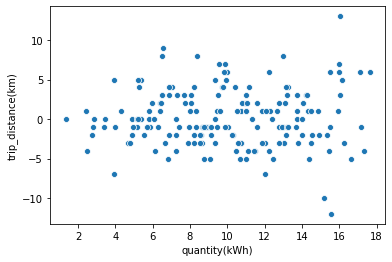

In [12]:
plot_difference(y_pred_tr)

In [13]:
data_l=pd.read_csv("data_enc_label.csv")

In [14]:
data_l.columns

Index(['manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'quantity(kWh)', 'fuel_type', 'tire_type', 'city',
       'motor_way', 'country_roads', 'driving_style', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)', 'ecr_deviation', 'fuel_note',
       'tire_type_enc', 'driving_style_enc'],
      dtype='object')

In [15]:
columns_xl=['quantity(kWh)' , 'city',
       'motor_way', 'country_roads', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)','tire_type_enc', 'driving_style_enc']
column_yl='trip_distance(km)'

In [16]:
y_predl_tr,msel_tr=tree_reg(data_l,columns_xl,column_yl)

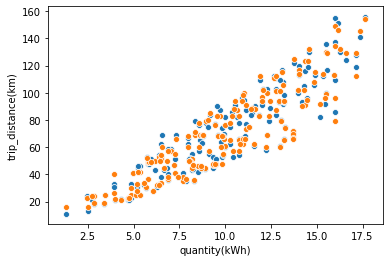

In [17]:
plot_graph(y_predl_tr)

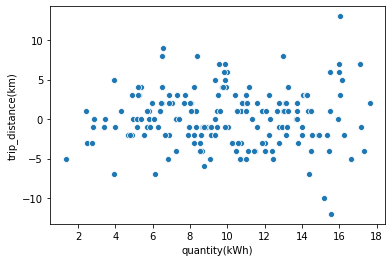

In [18]:
plot_difference(y_predl_tr)

In [19]:
data_d=pd.read_csv("data_enc_dummies.csv")

In [20]:
data_d.columns

Index(['manufacturer', 'model', 'version', 'fuel_date', 'odometer',
       'trip_distance(km)', 'quantity(kWh)', 'fuel_type', 'city', 'motor_way',
       'country_roads', 'consumption(kWh/100km)', 'A/C', 'park_heating',
       'avg_speed(km/h)', 'ecr_deviation', 'fuel_note',
       'tire_type_Summer tires', 'tire_type_Winter tires',
       'driving_style_Moderate', 'driving_style_Normal'],
      dtype='object')

In [21]:
columns_xd=['quantity(kWh)' , 'city',
       'motor_way', 'country_roads', 'consumption(kWh/100km)',
       'A/C', 'park_heating', 'avg_speed(km/h)','tire_type_Summer tires', 'tire_type_Winter tires',
       'driving_style_Moderate', 'driving_style_Normal']
column_yd='trip_distance(km)'

In [22]:
y_predd_tr,msed_tr=tree_reg(data_d,columns_xd,column_yd)

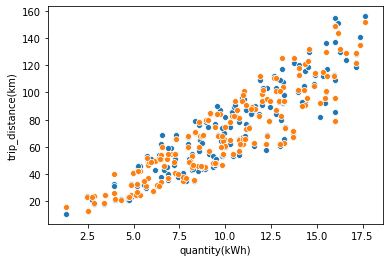

In [23]:
plot_graph(y_predd_tr)

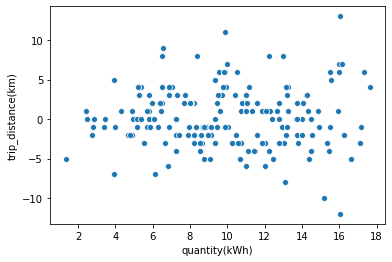

In [24]:
plot_difference(y_predd_tr)

In [25]:
print("MSE for normal LR is {}".format(mse_tr))
print("MSE for label encoded LR is {}".format(msel_tr))
print("MSE for dummy encoded LR is {}".format(msed_tr))

MSE for normal LR is 12.955555555555556
MSE for label encoded LR is 12.627777777777778
MSE for dummy encoded LR is 14.244444444444444


# Random Forest Regressor

In [26]:
def rf_reg(data,columns_x,column_y):
    global y_test_rf
    global X_test_rf
    reg=RandomForestRegressor(random_state=1)
    X=data[columns_x]
    Y=data[column_y]
    X_train,X_test_rf,y_train,y_test_rf=train_test_split(X,Y,random_state=1)
    reg.fit(X_train,y_train)
    y_pred=reg.predict(X_test_rf)
    mse=mean_squared_error(y_test_rf,y_pred)
    
    
    return y_pred,mse

In [27]:
y_pred_rf,mse_rf=rf_reg(data,columns_x,column_y)

In [28]:
def plot_graph_rf(y_pred):
    sns.scatterplot(X_test_rf['quantity(kWh)'],y_test_rf)
    sns.scatterplot(X_test_rf['quantity(kWh)'],y_pred)
    plt.show()

In [29]:
def plot_difference_rf(y_pred):
    sns.scatterplot(X_test_rf['quantity(kWh)'],y_test_rf-y_pred)
    plt.show()

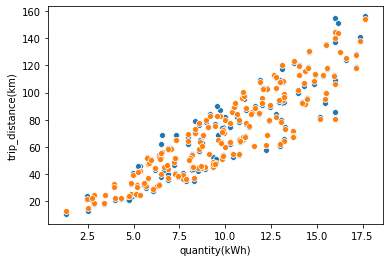

In [30]:
plot_graph_rf(y_pred_rf)

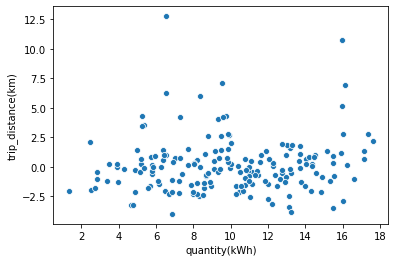

In [31]:
plot_difference_rf(y_pred_rf)

In [32]:
y_predl_rf,msel_rf=rf_reg(data_l,columns_xl,column_yl)

In [33]:
msel_rf

5.414235000000001

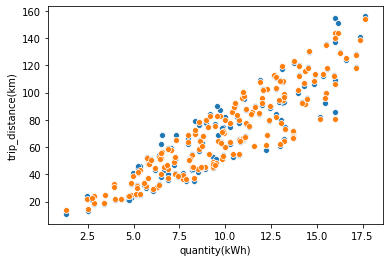

In [34]:
plot_graph_rf(y_predl_rf)

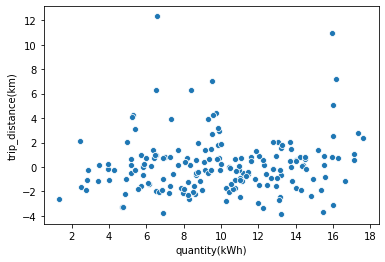

In [35]:
plot_difference_rf(y_predl_rf)

In [36]:
y_predd_rf,msed_rf=rf_reg(data_d,columns_xd,column_yd)

In [37]:
msed_rf

5.5533827777777764

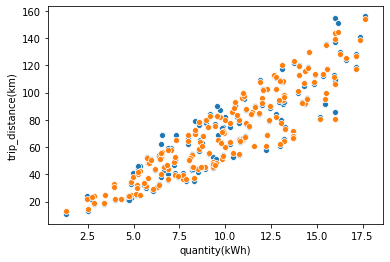

In [38]:
plot_graph_rf(y_predd_rf)

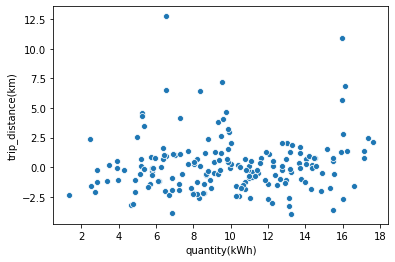

In [39]:
plot_difference_rf(y_predd_rf)

In [40]:
print("MSE for normal LR is {} km".format(mse_rf))
print("MSE for label encoded LR is {} km".format(msel_rf))
print("MSE for dummy encoded LR is {} km".format(msed_rf))

MSE for normal LR is 5.377892222222221 km
MSE for label encoded LR is 5.414235000000001 km
MSE for dummy encoded LR is 5.5533827777777764 km


In [41]:
data['consumption(kWh/100km)'].unique()

array([11.9 , 11.6 , 11.5 , 11.4 , 12.9 , 10.7 , 12.1 , 12.4 , 11.7 ,
       10.6 , 12.6 , 12.8 , 13.9 , 14.6 , 13.8 , 14.4 , 13.7 , 14.7 ,
       10.8 , 14.2 , 15.1 , 12.2 , 17.7 , 11.57, 11.2 , 15.3 , 15.4 ,
       18.9 , 10.9 , 13.1 , 11.3 , 13.5 , 16.8 , 16.3 , 15.6 , 16.2 ,
       16.9 , 16.5 , 14.8 , 14.  , 13.6 , 14.9 , 18.8 , 18.7 , 23.5 ,
       22.7 , 19.5 , 16.6 , 19.1 , 15.7 , 19.2 , 20.1 , 21.6 , 18.6 ,
       22.3 , 19.4 , 20.7 , 22.5 , 20.3 , 20.6 , 13.4 , 15.  , 18.4 ,
       15.5 , 20.9 , 17.2 , 17.8 , 21.2 , 18.2 , 17.1 , 15.2 , 16.4 ,
       12.5 , 16.1 , 17.4 , 10.3 , 11.8 , 11.  , 10.1 , 12.7 , 11.1 ,
        9.7 ,  9.5 ,  9.9 , 12.3 , 10.4 , 10.5 , 14.5 , 21.8 , 15.8 ,
       20.5 , 18.1 , 16.7 , 19.3 , 22.9 , 18.  , 18.5 , 19.9 , 16.  ,
       14.3 , 17.9 , 17.5 , 20.4 , 18.3 , 14.1 , 21.3 , 19.7 , 19.6 ,
       19.8 , 17.  , 13.  , 13.2 , 12.  , 10.2 , 15.9 , 17.3 , 19.  ,
       20.2 , 13.3 , 21.  , 23.7 , 21.1 , 17.6 , 22.1 , 23.  , 23.8 ,
       21.5 , 20.  ,